In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tifffile import TiffFile
from scipy.ndimage import label

def minprojection(arr):
   
    out = np.empty((arr.shape[0]-1, arr.shape[1], arr.shape[2]), dtype='uint8') #1 fewer frames than original
    for i in range(len(out)):
        out[i] = np.minimum(arr[i],arr[i+1])
        
    return out

def countarr(arr):
    out = []
    for i in range(len(arr)):
        labeled_arr, n_features = label(arr[i])
        out.append(n_features)
        
    return out



In [27]:
workdir = os.path.abspath(r"F:\full predictions\dspi4")

infiles = [f for f in os.listdir(workdir) if ".tif" in f]
alldata = pd.DataFrame()


for f in infiles:
    fname = f.split("_")
    strain = fname[0]
    condition = fname[1]
    
    with TiffFile(os.path.join(workdir, f)) as tif:
        
        arr = tif.asarray()[:,1,:,:]
        arr = arr > 1
        frames = list(range(len(arr)))
        minproj = minprojection(arr)
        proj_counts = countarr(minproj)
        proj_counts.append(0) #quickfix
        mask_counts = countarr(arr)
        
    df_out = pd.DataFrame({'strain':strain,
                           'frame':frames,
                           'condition':condition,
                           'file':f,
                           'nbact':mask_counts,
                           'nbound':proj_counts})
    
    df_out['fraction_bound'] = df_out['nbound']/df_out['nbact']
    df_out['fraction_motile'] = 1 - df_out['fraction_bound']
    df_out['nbact_norm'] = df_out['nbact']/max(df_out['nbact'])
    df_out['ntrack_norm'] = df_out['nbound']/max(df_out['nbound'])
    alldata = pd.concat([alldata, df_out]).reset_index(drop=True)

alldata.head()

,strain,frame,condition,file,nbact,nbound,fraction_bound,fraction_motile,nbact_norm,ntrack_norm
0,wt,0,OGM,wt_OGM_1_MMStack_Default.ome.tif,52,17,0.326923,0.673077,0.388060,0.177083
1,wt,1,OGM,wt_OGM_1_MMStack_Default.ome.tif,61,18,0.295082,0.704918,0.455224,0.187500
2,wt,2,OGM,wt_OGM_1_MMStack_Default.ome.tif,50,16,0.320000,0.680000,0.373134,0.166667
3,wt,3,OGM,wt_OGM_1_MMStack_Default.ome.tif,56,16,0.285714,0.714286,0.417910,0.166667
4,wt,4,OGM,wt_OGM_1_MMStack_Default.ome.tif,58,19,0.327586,0.672414,0.432836,0.197917


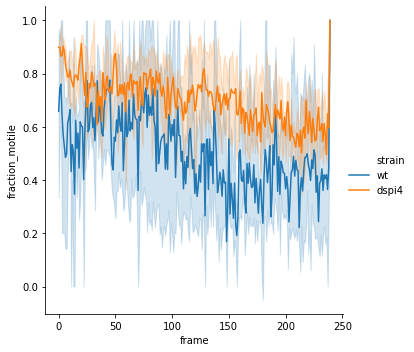

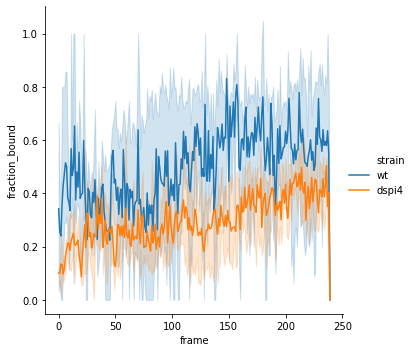

In [29]:


sns.relplot(data=alldata, x='frame', y='fraction_motile', hue='strain', kind='line')
sns.relplot(data=alldata, x='frame', y='fraction_bound', hue='strain', kind='line')

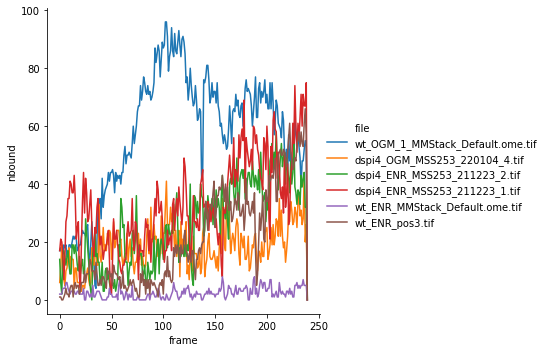

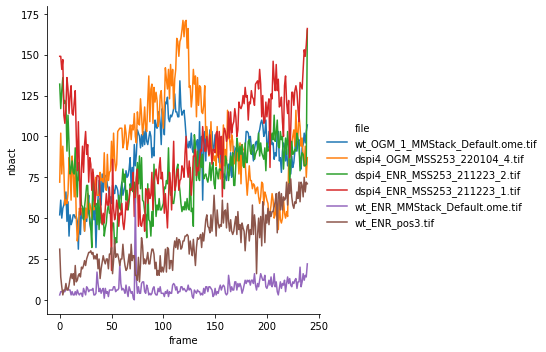

In [30]:
sns.relplot(data=alldata, x='frame', y='nbound', hue='file', kind='line')
sns.relplot(data=alldata, x='frame', y='nbact', hue='file', kind='line')

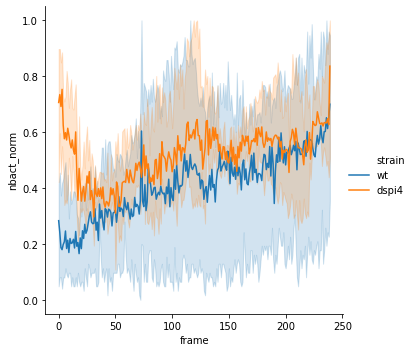

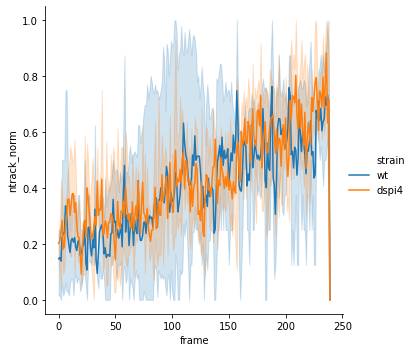

In [33]:
sns.relplot(data=alldata, x='frame', y='nbact_norm', hue='strain', kind='line')
sns.relplot(data=alldata, x='frame', y='ntrack_norm', hue='strain', kind='line')